## Compute Homography Matrix
To compute the Homography Matrix that maps points from one image plane to another

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

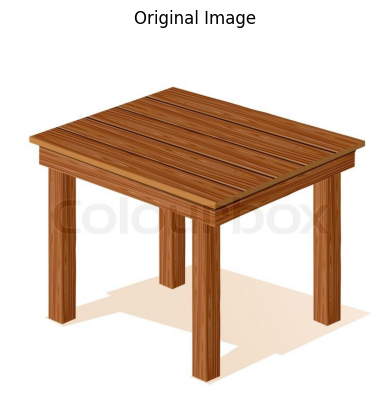

In [2]:
# 1. Read and display original image
img_path = 'images/table_image.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [3]:
# 2. Define source and destination points (manually chosen or from features)
# These are example corner coordinates of a document or rectangular object in the image
src_points = np.float32([
    [41, 228], 
    [352, 120], # top-right corner
    [444, 370], # bottom-right corner
    [767, 237]   # bottom-left corner
])

# Destination coordinates (desired straightened rectangle)
dst_points = np.float32([
    [0, 0],
    [400, 0],
    [0, 400],
    [400, 400],
])

In [4]:
# 3. Compute the Homography Matrix
H, status = cv2.findHomography(src_points, dst_points)
print("Homography Matrix (H):\n", H)

Homography Matrix (H):
 [[ 7.46284860e-01 -2.11797745e+00  4.52301180e+02]
 [ 6.95211364e-01  2.00195124e+00 -4.84948549e+02]
 [ 9.01672038e-05  1.00292946e-03  1.00000000e+00]]


In [5]:
# 4. Validate transformation for one sample point
src_pt = np.append(src_points[0], 1)
mapped_pt = H @ src_pt
mapped_pt /= mapped_pt[2]
print("Reprojected point for first corner:", mapped_pt[:2])

Reprojected point for first corner: [-9.22509635e-14 -9.22509635e-14]


In [6]:
# 5. Apply perspective warp using the computed matrix
warped_img = cv2.warpPerspective(img_rgb, H, (400, 400))

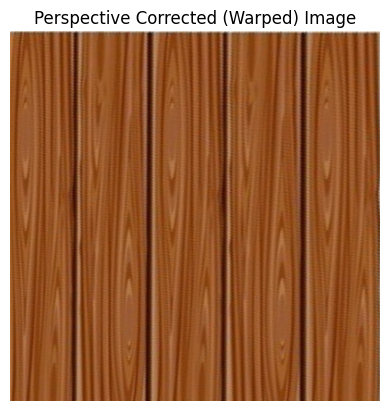

In [7]:
# 5. Display the transformed image
plt.imshow(warped_img)
plt.title("Perspective Corrected (Warped) Image")
plt.axis('off')
plt.show()